# JSC270 - Class 6 
## Prof. Taback
### Monday, February 11, 2019

# Simple Linear Regression

- Suppose that we are data scientists hired by a client to provide advice on how to improve sales of a particular product. 

- The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
advert = pd.read_csv('Advertising.csv', usecols = [1,2,3,4])

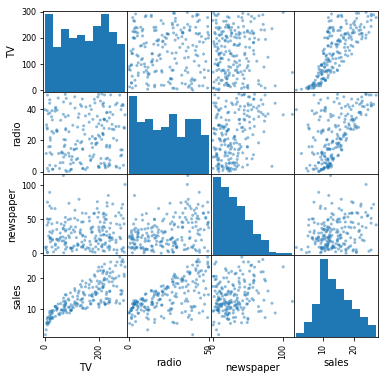

In [3]:
from pandas.plotting import scatter_matrix

#advert.plot.scatter(x = 'TV', y = 'sales')
scatter_matrix(advert, alpha=0.5, figsize=(6, 6));

# Questions

- Which media (TV, Radio, Advertising) contribute to sales?
- Which media generate the biggest boost in sales?
- How much increase in sales is associated with a given increase in TV advertising?
- Will sales increase if more is spent on advertising? 

# Machine Learning approaches to answering Questions

- `TV`, `radio`, `newspaper` are examples of **input variables/covariates/features**. Often denoted as $X_{ij}, i=1,2, \ldots, 200; j=1,2,3$. 

- `sales` is an example of a **response or dependent variable**. Often denoted as $Y_{i}, i=1,2,\ldots,200$.

- Assume there is some relationship between $Y$ and $X_1, X_2, X_3$,

$$Y=f(X)+\epsilon.$$

- $f$ is a fixed unknown function of $X_1,X_2,X_3$ and $\epsilon$ is a random error term, independent of $X$.

- Machine learning (ML) refers to a set of approaches for estimating $f$.


# Prediction

- In many situations, $X$ is readily available, but $Y$ cannot be easily obtained. 
- In this setting, since the error term averages to zero, we can predict $Y$ using

$$\hat Y = \hat{f}(X),$$

where $\hat f$ is an estimate of $f$ and $\hat Y$ is the prediction for $Y$.

- The exact form of $\hat f$ is often not of direct interest provided that it produces accurate predictions.

# Prediction

- The accuracy of $\hat Y$ as a prediction for $Y$ depends on: reducible error and the irreducible error. 

- $\hat f$ will not be a perfect estimate for f, and this inaccuracy will introduce some error. This error is reducible because we can potentially improve the accuracy by using the most appropriate technique to estimate $f$. 

- Even if it were possible to form a perfect estimate for $f$, $\hat Y = f(X)$, our prediction would still error. 

# Prediction

- $Y$ is also a function of $\epsilon$, which, by definition, cannot be predicted using X. Therefore, variability associated with $\epsilon$ also affects the accuracy of our predictions. This is known as the irreducible error, because no matter how well we estimate $f$ we cannot reduce the error introduced by $\epsilon$.

Let $\hat Y = \hat f(X)$.  Then 

$$\begin{align*} 
E(\hat Y - Y)^2 &= E\left(f(X)+\epsilon - \hat f(X)\right)^2 \\
                &= E\left(f(X) - \hat f(X)\right)^2 + E(\epsilon^2) \\
                &= \underbrace{\left(f(X) - \hat f(X)\right)^2}_{\text Reducible} + \underbrace{Var(\epsilon)}_{\text Irreducible}.
\end{align*}$$

- The focus of ML is minimizing the reducible error.  

# Inference

How is $Y$ affected if $X_1,\dots,X_p$ change? The goal is to estimate f, but not necessarily make predictions for $Y$. 

Questions:

- Which predictors are associated with the response? 

- What is the relationship between the response and each predictor?

- Can the relationship between Y and each predictor be adequately sum- marized using a linear equation, or is the relationship more complicated?


# Inference or prediction?

- Which media (TV, Radio, Advertising) contribute to sales?
- Which media generate the biggest boost in sales?
- How much increase in sales is associated with a given increase in TV advertising?
- Will sales increase if more is spent on advertising? 

# Estimating $f$

## Parametric Methods

Example:

$$f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p $$

Estimating $f$ is equivalent to estimating $\beta_0, \beta_1, \ldots, \beta_p$.  

## Non-parametric Methods

Example:

$$f(X) = \beta_0 + f_1(X_1) + f_2(X_2) + \cdots + f_p(X_p), $$

where $f_j$ is a smooth non-linear function. Estimating $f$ is equivalent to estimating the functions $f_j, j=1,\ldots,p$. 

# Simple Linear Regression

The model:

$$\text{sales}_i= \beta_0+\beta_1\text{TV}_i+\epsilon_i, i=1,\ldots,200. $$



In [4]:
X = advert.TV
X = sm.add_constant(X)
y = advert.sales
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        21:23:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Text(0, 0.5, 'Sales')

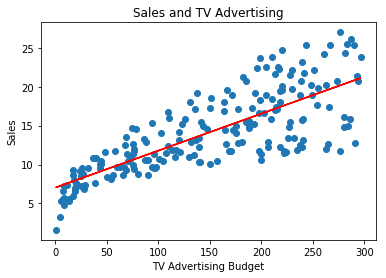

In [5]:
plt.scatter(advert.TV, advert.sales)
plt.plot(advert.TV, results.params[0] + results.params[1]*advert.TV, color = 'red');
plt.title('Sales and TV Advertising')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')


Add a higher order term to the model:

$$\text{sales}_i= \beta_0+\beta_1\text{TV}_i+\beta_2\text{TV}^2_i+\epsilon_i, i=1,\ldots,200. $$

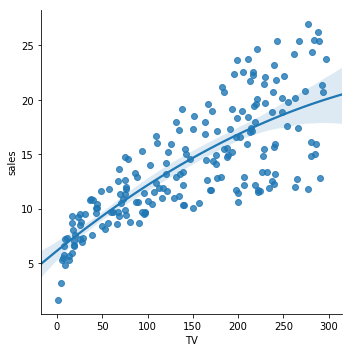

In [6]:
import seaborn as sns
# add a higher-order term term
sns.lmplot('TV', 'sales', advert, order=2)

# Regression Models

The model is:

$$\text{sales}_i = \beta_0 + \beta_1 \text{TV}_i + \epsilon_i, i= 1,\dots, 200. $$

The estimated linear regression equation is:

$$\hat{\text{sales}_i} = 7.0326 + 0.0475 \text{TV}_i, i= 1,\dots, 200.$$

$\hat{\text{sales}_i}$ is the predicted value of the $i^{th}$ sales based on $\text{TV}_i$.

## Inference

The p-value for testing $H_0:\beta_1=0$ is 0.000, and the 95% CI for $\beta_1$ is \[0.025, 0.975\].

Inference in regression usually assumes that the residuals $e_i = \text{sales}_i - \hat{\text{sales}_i}$ are $N(0,1)$.

$R^2$ for the model is 0.612.

Interpretation of $\beta_0, \beta_1, R^2$?

## Predicting a new value

The predicted sales of a TV advertising budget of 200 is: $7.0326 + 0.0475\times 200 =16.533$.

In [7]:
print(' TV_1:', advert.TV[0],'\n',
      'sales_1:', advert.sales[0],'\n',
      'predicted:', results.predict()[0],'\n',
      'residual:', results.resid[0])

 TV_1: 230.1 
 sales_1: 22.1 
 predicted: 17.970774512765544 
 residual: 4.129225487234457


# Predicting House Price

Harrison and Rubinfield (1978) investigated "problems associated with the use of housing market data to measure the willingness to pay for clean air". 

The dataset consists of 506 observations of 14 attributes. The median value of house price in $1000s, denoted by MEDV, is the outcome or the dependent variable in our model. Below is a brief description of each feature and the outcome in our dataset:

CRIM – per capita crime rate by town

ZN – proportion of residential land zoned for lots over 25,000 sq.ft

INDUS – proportion of non-retail business acres per town

CHAS – Charles River dummy variable (1 if tract bounds river; else 0)

NOX – nitric oxides concentration (parts per 10 million)

RM – average number of rooms per dwelling

AGE – proportion of owner-occupied units built prior to 1940

DIS – weighted distances to five Boston employment centres

RAD – index of accessibility to radial highways

TAX – full-value property-tax rate per $10,000

PT – pupil-teacher ratio by town

B – $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of black people by town

LSTAT – % lower status of the population

MV – Median value of owner-occupied homes in $1000’s

Shape of data: (506, 13)
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


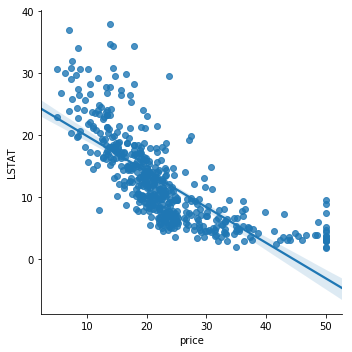

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()

X_boston, y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape) 
print('Feature names:', boston.feature_names)

df_boston = pd.DataFrame(boston.data, columns = boston.feature_names) 
df_boston['price'] = boston.target
sns.lmplot('price', 'LSTAT', df_boston, order = 1);

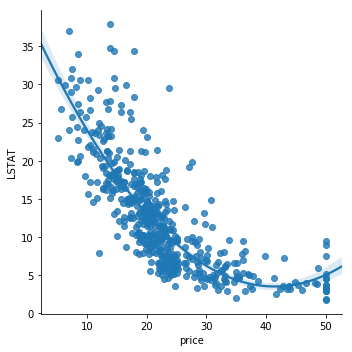

In [9]:
sns.lmplot('price', 'LSTAT', df_boston, order = 2);

We can explore the relationship of several variables using a scatterplot matrix.

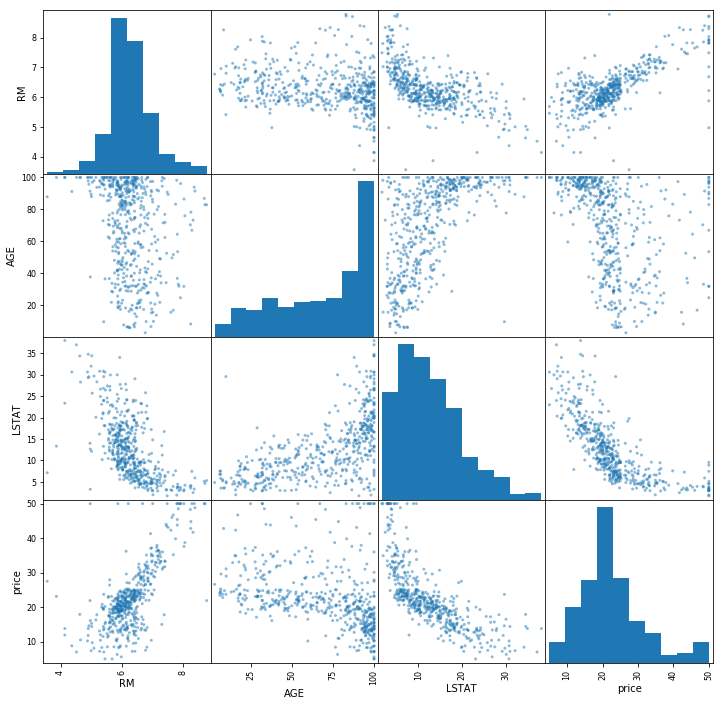

In [10]:
indexes=[5,6,12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes]) 
df2['price'] = boston.target
pd.scatter_matrix(df2, figsize = (12.0, 12.0));

# Overfitting

- If the data used to fit a model yields a small (in-sample) error relative to the error when the model is used on data that was not used to build the model then we are said to be **overfitting** the data. 

- Instead of using all the data to estimate $f$ we can split the data into test and training sets.  For example, we may build the model on 1/2 the data and test it on the remaining half.

# Prediction Accuracy in Regression

One measure of prediction accuracy is mean squared error: 

$$MSE=\frac{1}{n}\sum_{i=1}^n (y_i - \hat y_i)^2.$$

- Training set
- Test set
- measures of prediction accuracy

In [11]:
from sklearn import linear_model 
from sklearn import metrics

# split data in 1/2 for tarining and testing
train_size = int(X_boston.shape[0]/2)

X_train = X_boston[:train_size]
X_test = X_boston[train_size:]

y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Training and testing set sizes', X_train.shape, X_test.shape) 

regr = linear_model.LinearRegression()
# estimate coefficients
regr.fit(X_train, y_train) 

print('Coeff and intercept:', regr.coef_, regr.intercept_)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, regr.predict(X_test)))

Training and testing set sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944993
Mean Squared Error: 303.4368629265912


# Cross validation for regression

- The cross validation approach is to leave out a portion of the data set and test the model on the remaining data.
- $k$-fold cross validation involves randomly dividing the set of observations into $k$ groups, or folds, of approximately equal size. 
- The first fold is treated as a validation set, and the method is fit on the remaining $k − 1$ folds. 
- The mean squared error, $MSE_1$, is then computed on the observations in the held-out fold. 
- This procedure is repeated $k$ times; each time, a different group of observations is treated as a validation set. 
- This process results in $k$ estimates of the test error, $MSE_1, MSE_2,\ldots , MSE_k$. The $k$-fold CV estimate is computed by averaging these values

$$CV = \frac{1}{k}\sum_{i=1}^{k}MSE_i. $$

10 fold cross validation using $MSE$ as the evaluation metric.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# see https://scikit-learn.org/stable/modules/model_evaluation.html
# neg_mean_squared_error returns negative MSE
scores = cross_val_score(linear_model.LinearRegression(), X_boston, y_boston, scoring='neg_mean_squared_error', cv=10)
scores.mean()*-1

34.705255944524815

# Linear Model Selection

- One extension of least squares is called the Lasso.

- The least squares procedure estimates $\beta_0, \beta_1, \ldots,\beta_p$ using values that minimize

$$RSS = \sum_{i=1}^n \left(y_i-\beta_0-\sum_{i=1}^p \beta_jx_{ij} \right)^2. $$

The Lasso minimizes the quantity

$$RSS + \alpha \sum_{i=1}^p |\beta_j|. $$

- Increasing the value of $\alpha$ will *shrink* the coefficient estimates towards 0.
- If $\alpha$ is large enough then some of the coefficients will be exactly 0.  Hence the lasso performs variable selection. 

In [13]:
regr_lasso = linear_model.Lasso(alpha = .3) 
regr_lasso.fit(X_train, y_train) 
print('Coeff and intercept:',regr_lasso.coef_)
print('Tesing Score:', regr_lasso.score(X_test, y_test))
print('Training MSE:', np.mean((regr_lasso.predict(X_train) - y_train)**2))     
print('Testing MSE: ', np.mean((regr_lasso.predict(X_test) - y_test)**2))

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817]
Tesing Score: 0.501127529021216
Training MSE: 10.73431100954422
Testing MSE:  46.538168094875665


# Classification
## Logistic Regression

# NHEFS

- National Health and Nutrition Examination Survey Data I Epidemiologic Follow-up Study. 

- The NHEFS was jointly initiated by the National Center for Health Statistics and the National Institute on Aging in collaboration with other agencies of the United States Public Health Service. 

Question: What is the relationship between quitting smoking and sex, age race, height, school, and alcohol use?


Outcome variable: Quit smoking

Independent variables/covariates/features: sex; age; race; height; school; alcoholpy (have you had 1 drink in past year of 1971?); smokeintensity (number of cigarettes per day in 1971).

# Logistic Regression

- How should we model the relationship between quitting smoking and the features, $X$, sex; age; race; height; school; alcoholpy (have you had 1 drink in past year of 1971?); smokeintensity (number of cigarettes per day in 1971)?

- Let $Y=1$ if a person quit smoking and $Y=0$ if a person did not quit smoking.  We want to model 

$$p(X)=P(Y=1|X).$$

- Suppose $X$ is age.  If we use $p(X)=\beta_0+\beta_1X$ then what would the plot of $\hat p$ versus Age look like?

# The logistic function

- $$p(X)=\frac{\exp(\beta_0+\beta_1X)}{1+\exp(\beta_0+\beta_1X)}. $$

- The model is fit using maximum likelihood estimation.

- The model implies that:

$$\log\left(\frac{p(X)}{1-p(X)}\right)= \beta_0+\beta_1X.$$

- Let $\hat \beta_0, \hat \beta_1$ be the estimates of $\beta_0, \beta_1$ then the predicted probabilities are:

$$\hat p(X) = \frac{\exp(\hat \beta_0+\hat \beta_1X)}{1+\exp(\hat \beta_0+ \hat\beta_1X)}.$$

In [14]:
nhefs_all = pd.read_excel('NHEFS.xls')
nhefs_all.shape

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(1629, 64)

In [15]:
print(nhefs_all.columns)

Index(['seqn', 'qsmk', 'death', 'yrdth', 'modth', 'dadth', 'sbp', 'dbp', 'sex',
       'age', 'race', 'income', 'marital', 'school', 'education', 'ht', 'wt71',
       'wt82', 'wt82_71', 'birthplace', 'smokeintensity', 'smkintensity82_71',
       'smokeyrs', 'asthma', 'bronch', 'tb', 'hf', 'hbp', 'pepticulcer',
       'colitis', 'hepatitis', 'chroniccough', 'hayfever', 'diabetes', 'polio',
       'tumor', 'nervousbreak', 'alcoholpy', 'alcoholfreq', 'alcoholtype',
       'alcoholhowmuch', 'pica', 'headache', 'otherpain', 'weakheart',
       'allergies', 'nerves', 'lackpep', 'hbpmed', 'boweltrouble', 'wtloss',
       'infection', 'active', 'exercise', 'birthcontrol', 'pregnancies',
       'cholesterol', 'hightax82', 'price71', 'price82', 'tax71', 'tax82',
       'price71_82', 'tax71_82'],
      dtype='object')


In [16]:
restriction_cols = [
    'sex', 'age', 'race', 'wt82', 'ht', 'school', 'alcoholpy', 'qsmk'
]

# alcoholpy == 2 is missing 
nhefs_all['alcoholpy'] = nhefs_all['alcoholpy'].replace({2: np.nan})

missing = nhefs_all[restriction_cols].isnull().any(axis=1)
print('Number of missing:', missing.sum())
# only include individuals without missing values on these variables
nhefs = nhefs_all.loc[~missing]
print('Number of observations and varaibles in data set:', nhefs.shape)

Number of missing: 68
Number of observations and varaibles in data set: (1561, 64)


In [17]:
nhefs[restriction_cols].describe()

,sex,age,race,wt82,ht,school,alcoholpy,qsmk
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000
mean,0.513133,43.668161,0.131967,73.452325,168.715887,11.182575,0.875080,0.257527
std,0.499988,12.001712,0.338563,16.178103,9.019865,3.059345,0.330734,0.437412
min,0.000000,25.000000,0.000000,35.380205,142.875000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,61.688562,161.781250,10.000000,1.000000,0.000000
50%,1.000000,43.000000,0.000000,72.121187,168.187500,12.000000,1.000000,0.000000
75%,1.000000,53.000000,0.000000,83.460996,175.281250,12.000000,1.000000,1.000000
max,1.000000,74.000000,1.000000,136.531303,198.093750,17.000000,1.000000,1.000000


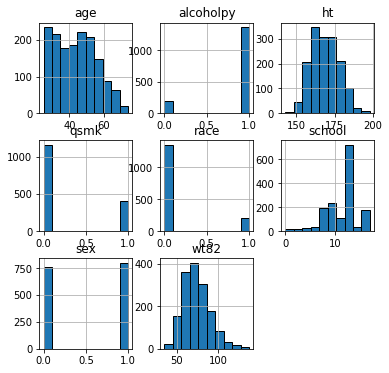

In [18]:
nhefs[restriction_cols].hist(edgecolor ='black',figsize=(6, 6));

# Dummy Variables

A nominal variable to describe region of Canada (excluding territories) is:

$$ X =
\left\{
	\begin{array}{ll}
		1  & \mbox{if Eastern Canada} \\
		2 & \mbox{if Central Canada} \\
        3 & \mbox{if Western Canada}
	\end{array}
\right.$$



A dummy variables $D_1, D_2$ to describe $X$ are:  

$$ D_1 =
\left\{
	\begin{array}{ll}
		1  & \mbox{if Eastern Canada} \\
		0 & \mbox{otherwise}
	\end{array}
\right.,
D_2 =
\left\{
	\begin{array}{ll}
		1  & \mbox{if Central Canada} \\
		0 & \mbox{otherwise}
	\end{array}
\right.$$

- If the nominal independent variable of interest has $k$ categories then exactly $k-1$ dummy variables should be defined to index these categories provided the regression model contains an intercept term.

In [19]:
pd.crosstab(nhefs['qsmk'],nhefs['school'])

school,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17
qsmk,,,,,,,,,,,,,,,,,
0,6,6,4,9,10,12,22,37,102,59,120,86,479,64,28,61,54
1,4,0,4,4,3,2,11,13,40,22,32,20,156,23,6,35,27


In [20]:
# create dummy variables for school
sch_dum = pd.get_dummies(nhefs['school'], prefix = 'sch', drop_first = True)
sch_dum.head()

,sch_1,sch_2,sch_3,sch_4,sch_5,sch_6,sch_7,sch_8,sch_9,sch_10,sch_11,sch_12,sch_13,sch_15,sch_16,sch_17
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
# create a dataframe where school is split into 
nhefs_lr = pd.get_dummies(nhefs[restriction_cols], columns = ['school'], prefix = ['sch'], drop_first = True)
nhefs_lr.head()

,sex,age,race,wt82,ht,alcoholpy,qsmk,sch_1,sch_2,sch_3,...,sch_7,sch_8,sch_9,sch_10,sch_11,sch_12,sch_13,sch_15,sch_16,sch_17
0,0,42,1,68.946040,174.1875,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,36,0,61.234970,159.3750,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,56,1,66.224486,168.5000,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,68,1,64.410117,170.1875,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,40,0,92.079251,181.8750,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Split the data into training and test sets.

<a href='https://scikit-learn.org/stable/index.html'> <img src='sklearn.png'> </a>

In [22]:
from sklearn.model_selection import train_test_split


y_smk = nhefs_lr['qsmk']

# drop qsmk so that only features are in data set
x_smk = nhefs_lr.drop(['qsmk'], axis =1)

# split into 2/3 training and 1/3 test 
X_train, X_test, y_train, y_test = train_test_split(x_smk, y_smk, 
                                                    test_size=0.33, random_state=37)

print(len(X_train),len(X_test))
print(len(y_train),len(y_test))
sum(y_test == 1),sum(y_test == 0) 

1045 516
1045 516


(132, 384)

Fit a logistic regression model.

In [23]:
#logistic regression from sklearn
logreg = linear_model.LogisticRegression().fit(X_train,y_train)
print(logreg.score(x_smk,y_smk), logreg.coef_, logreg.intercept_)
y_pred = logreg.predict(X_test)

0.7469570787956438 [[-0.11003095  0.0217878  -0.54333267  0.0243723  -0.01529905 -0.16893044
  -0.38530811  0.56246754  0.15266023 -0.04945581 -0.66212621  0.28078551
  -0.0011482  -0.18678197 -0.13492912 -0.55447058 -0.50933567 -0.08728495
  -0.03872728 -0.30333532  0.53581919  0.12553494]] [-0.87591596]


Calculate accuracy statistics.  A good reference is [Wikipedia.](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values) 

In [24]:

confu_mat = metrics.confusion_matrix(y_test, y_pred)
confu_mat_df = pd.DataFrame(confu_mat,columns = ['Quit_Smoke_No_Test', 'Quit_Smoke_Yes_Test'], 
                            index = ['Quit_Smoke_No_Pred', 'Quit_Smoke_Yes_Pred'])
print('Confusion Matrix')
display(confu_mat_df)
print('Sensitivity, Specificity, False Negative, False Positive')
display(confu_mat_df.apply(lambda x: x/x.sum(), axis = 0))
acc = np.round(confu_mat.diagonal().sum()/confu_mat.sum(),3)
print('Overall accuracy:', acc)

print('Positive predictive value, Negative predictive value, Specificity, False Negative, False Positive')
display(confu_mat_df.apply(lambda x: x/x.sum(), axis = 1))



# alternatively use the built-in scikit learn method: 
# metrics.accuracy_score(y_test,y_pred)

Confusion Matrix


,Quit_Smoke_No_Test,Quit_Smoke_Yes_Test
Quit_Smoke_No_Pred,377,7
Quit_Smoke_Yes_Pred,126,6


Sensitivity, Specificity, False Negative, False Positive


,Quit_Smoke_No_Test,Quit_Smoke_Yes_Test
Quit_Smoke_No_Pred,0.749503,0.538462
Quit_Smoke_Yes_Pred,0.250497,0.461538


Overall accuracy: 0.742
Positive predictive value, Negative predictive value, Specificity, False Negative, False Positive


,Quit_Smoke_No_Test,Quit_Smoke_Yes_Test
Quit_Smoke_No_Pred,0.981771,0.018229
Quit_Smoke_Yes_Pred,0.954545,0.045455


`sklearn` style accuracy using `classification_report`.  

In [25]:
from sklearn.metrics import classification_report
# The precision is the ability of the classifier not to label 
# as positive a sample that is negative and vice-versa (cf. sens and spec.)

# The recall is the ability of the classifier to find all the 
# positive samples (cf. positive and negative predictive values)

target_names = ['Quit_Smoke_No', 'Quit_Smoke_Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 Quit_Smoke_No       0.75      0.98      0.85       384
Quit_Smoke_Yes       0.46      0.05      0.08       132

     micro avg       0.74      0.74      0.74       516
     macro avg       0.61      0.51      0.47       516
  weighted avg       0.68      0.74      0.65       516



Use 10-fold cross validation to estimate accuracy in logistic regression model.

In [26]:
scores = cross_val_score(linear_model.LogisticRegression(), x_smk, y_smk, scoring='accuracy', cv=10)
scores.mean()

0.7380104102458735

- Fit logistic regression using `statsmodels`. 
- We can use R style model formula `y ~ x`.
- In this case `x` is a continuous variable.

In [27]:
import statsmodels.formula.api as smf

f = 'qsmk ~ age'
logitfit = smf.logit(formula = str(f), data = nhefs).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.562784
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1561
Model:                          Logit   Df Residuals:                     1559
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                 0.01345
Time:                        21:23:36   Log-Likelihood:                -878.51
converged:                       True   LL-Null:                       -890.48
                                        LLR p-value:                 9.903e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1084      0.227     -9.286      0.000      -2.553      -1.663
age            0.0236      0.005      4.869      0.000       0.014       0.033
==============================================================================
"""

- Use R style formula `qsmk ~ C(sex)`. `C(sex)` treats `sex` as a factor variable and will create appropriate dummy variables.

In [28]:
f = 'qsmk ~ C(sex)'
logitfit = smf.logit(formula = str(f), data = nhefs).fit()
print(logitfit.summary())

b1 = np.round(np.exp(logitfit.params[1]),3)

pd.crosstab(nhefs.sex.replace({0: 'Male', 1: 'Female'}), 
            nhefs.qsmk.replace({0: 'No', 1: 'Yes'}), colnames=['Quit Smoking'],rownames=['Sex'])

Optimization terminated successfully.
         Current function value: 0.568126
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   qsmk   No. Observations:                 1561
Model:                          Logit   Df Residuals:                     1559
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                0.004082
Time:                        21:23:36   Log-Likelihood:                -886.84
converged:                       True   LL-Null:                       -890.48
                                        LLR p-value:                  0.007009
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9043      0.080    -11.291      0.000      -1.061      -0.747
C(sex)[T.1]    -0.3127    

Quit Smoking,No,Yes
Sex,,
Female,618,183
Male,541,219


The estimated odds ratio is $\exp(\hat \beta_1) = \exp(-0.3127) = $ {{b1}}.

In [29]:
odds_male = np.round((183/618),3)
odds_fems = np.round((219/541),3)
OR = np.round(odds_male/odds_fems,3)
odds_male, odds_fems, OR

(0.296, 0.405, 0.731)

The odds of quitting smoking in males is {{odds_male}}, and the odds of quitting smoking in females is {{odds_fems}}.  The odds ratio of quitting smoking in males versus females is {{OR}}.

Multivariable logistic regression model.

In [30]:
import statsmodels.formula.api as smf

f = 'qsmk ~ sex + age + race + wt82 + ht + school + alcoholpy'
logitfit = smf.logit(formula = str(f), data = nhefs).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.548214
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1561
Model:                          Logit   Df Residuals:                     1553
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                 0.03899
Time:                        21:23:36   Log-Likelihood:                -855.76
converged:                       True   LL-Null:                       -890.48
                                        LLR p-value:                 1.923e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7238      1.727     -1.577      0.115      -6.109       0.662
sex           -0.1124      0.173     -0.651      0.515      -0.451       0.226
age            0.0287      0.005      5.424      0.000       0.018       0.039
race          -0.5946      0.201     -2.960      0.003      -0.988      -0.201
wt82           0.0212      0.004      5.124      0.000       0.013       0.029
ht            -0.0081      0.010     -0.813      0.416      -0.028       0.011
school         0.0365      0.021      1.738      0.082      -0.005       0.078
alcoholpy     -0.1237      0.178     -0.695      0.487      -0.472       0.225
==============================================================================
"""

# Decision Trees

The scatter plot below shows two variables `x1`, `x2` coloured by a variable `y` that is either 0 or 1. 

Text(0, 0.5, 'x1')

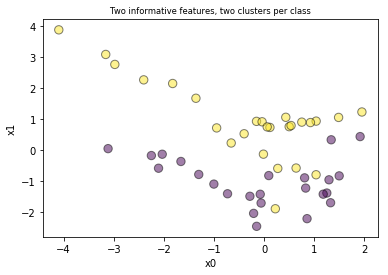

In [31]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles


plt.title("Two informative features, two clusters per class",
          fontsize='small')
X1, Y1 = make_classification(n_samples = 50, n_features=2, n_redundant=0, n_informative=2, random_state=20)
p = plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, alpha = 0.5, s=70, edgecolor='k')
plt.xlabel('x0'); plt.ylabel('x1')

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split = 20,min_samples_leaf = 20, max_depth = 2)
clf = clf.fit(X1, Y1)

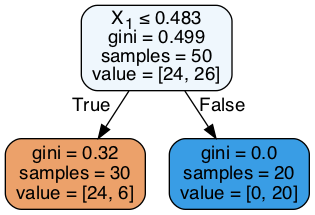

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                #feature_names=['x1','x2'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Y1,0,1,All
X1<=0.483,,,
False,0,20,20
True,24,6,30
All,24,26,50


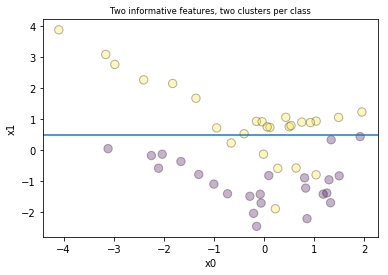

In [34]:
display(pd.crosstab(X1[:, 1] <= 0.483, Y1, colnames=['Y1'], rownames=['X1<=0.483'], margins=True))
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X1, Y1 = make_classification(n_samples = 50, n_features=2, n_redundant=0, n_informative=2, random_state=20)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, alpha = 0.3,
            s=70, edgecolor='k')
plt.xlabel('x0'); plt.ylabel('x1'); plt.axhline(y=0.483);


## Splitting Rules

Let $\hat p_{mk}$ be the proportion of observations in the $m^{th}$ region that are from the $k^{th}$ class. The Gini index is:

$$\sum_{i=1}^K {\hat p_{mk}}(1- {\hat p_{mk}}).$$

In this case $K=2$. It is a measure of variance across the two classes.  

There are other splitting rules.

## Assigning Terminal Node to a Class

The assigned class of a terminal node is number of class $j$ cases in node $t$ which is largest.



# Four elements needed to grow a tree

1. A set of binary questions of the form $\{\text{is } x \in A\}$?
2. A goodness of split criterion.
3. A stop-splitting rule.
4. A rule for assigning every terminal node to a class.

# Predicting Quitting Smoking

In [35]:
y_qsmk = nhefs[restriction_cols]['qsmk']
x_data = nhefs[restriction_cols].drop(['qsmk'], axis =1)

clf = tree.DecisionTreeClassifier(min_samples_split = 20, max_depth = 3)
clf = clf.fit(x_smk, y_smk)

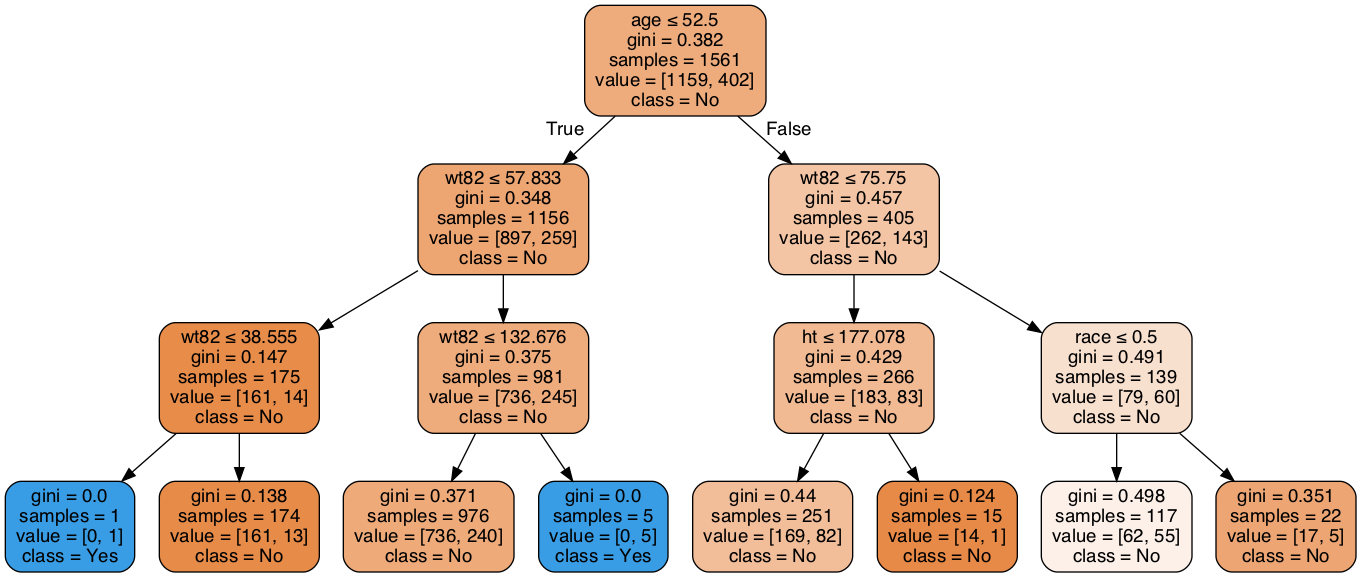

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=list(x_smk),
                class_names=['No','Yes'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
# crosstab to verify values in decision tree
display(pd.crosstab(nhefs_lr['qsmk'], nhefs_lr['age'] <= 52.5, margins = True))
pd.crosstab(nhefs_lr['qsmk'], [nhefs_lr['age'] <= 52.5,nhefs_lr['wt82'] <= 75.75, nhefs_lr['race']], margins = True)

age,False,True,All
qsmk,,,
0,262,897,1159
1,143,259,402
All,405,1156,1561


age  False               True                All
wt82 False     True     False     True          
race     0   1    0   1     0   1    0   1      
qsmk                                            
0       62  17  159  24   284  60  484  69  1159
1       55   5   76   7   120  16  115   8   402
All    117  22  235  31   404  76  599  77  1561

# Accuracy of Classification Tree

In [38]:
clf = tree.DecisionTreeClassifier(min_samples_split = 20, max_depth = 15)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

1.0
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       384
           1       0.24      0.22      0.23       132

   micro avg       0.63      0.63      0.63       516
   macro avg       0.49      0.49      0.49       516
weighted avg       0.61      0.63      0.62       516



In [39]:
clf = tree.DecisionTreeClassifier(min_samples_split = 20, max_depth = 3)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

1.0
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       384
           1       0.67      0.03      0.06       132

   micro avg       0.75      0.75      0.75       516
   macro avg       0.71      0.51      0.46       516
weighted avg       0.73      0.75      0.65       516



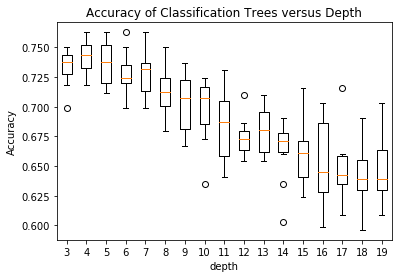

In [40]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x_smk, y=y_smk, scoring='accuracy', cv=10)
    depth.append(scores)

plt.boxplot(depth);
plt.title('Accuracy of Classification Trees versus Depth')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.xticks(np.delete(np.arange(18),0),[str(i) for i in range(3,20)]);

- A way to reduce the variance and increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. 
- In other words, we could calculate $f^1(x),f^2(x),...,f^B(x)$ using $B$ separate training sets, and average them in order to obtain a single low-variance statistical learning model.
$$\hat f_{avg}(x)=\frac{1}{B}\sum_{i=1}^B f^i(x).$$

- But, we usually don't have different training sets so we generate $B$ different bootstrapped training samples.  This is called bagging (bootstrap aggregation).
- For a given test observation, we can record the class predicted by each of the $B$ trees, and take a majority vote: the overall prediction is the most commonly occurring majority class among the B predictions.

# Ensemble Techniques

- Random Forest is an ensemble technique. 
- Ensemble techniques rely on combining different classifiers using some aggregation technique. 
- Ensemble techniques usually have good properties for combating overfitting. 
- The aggregation of classifiers using a voting technique reduces the variance of the final classifier. 

# Random Forest Classifier

- Random forests provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. As in bagging, we build a number of decision trees on bootstrapped training samples. 

- But when building these decision trees, each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. 

- The split is allowed to use only one of those $m$ predictors. A fresh sample of $m$ predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$, where $p$ is the total number of predictors/features.

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0, max_features='sqrt')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

1.0
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       384
           1       0.32      0.12      0.18       132

   micro avg       0.71      0.71      0.71       516
   macro avg       0.54      0.52      0.50       516
weighted avg       0.64      0.71      0.66       516



# Variable Importance
add up the total amount that the Gini index is decreased by splits over a given predictor, averaged over all $B$ trees.

Feature ranking: (feature, name, importance)
(3, 'wt82', 0.28472714538208793)
(4, 'ht', 0.2788530093858217)
(1, 'age', 0.23348605963745278)
(5, 'alcoholpy', 0.024657306403877914)
(0, 'sex', 0.023178951349157494)
(17, 'sch_12', 0.02056877770740319)
(2, 'race', 0.018941519556898153)
(13, 'sch_8', 0.01383274881901373)
(15, 'sch_10', 0.013435804582634412)
(20, 'sch_16', 0.012446958835562074)
(21, 'sch_17', 0.010365672555268698)
(14, 'sch_9', 0.010260690725515699)
(16, 'sch_11', 0.010122865363125413)
(18, 'sch_13', 0.00986103488159902)
(11, 'sch_6', 0.007898881004926474)
(12, 'sch_7', 0.0078305320446074)
(19, 'sch_15', 0.005706661111694355)
(8, 'sch_3', 0.004383486470914509)
(7, 'sch_2', 0.003490144491696981)
(10, 'sch_5', 0.00295435177588535)
(9, 'sch_4', 0.0026591873680064746)
(6, 'sch_1', 0.0003382105468502316)


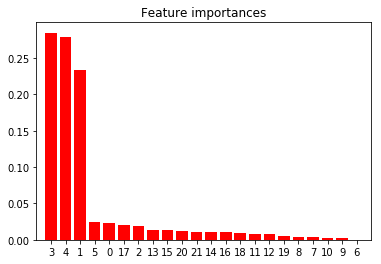

In [42]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking: (feature, name, importance)")
[print((x, list(X_test)[x],importances[x])) for x in indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]]);